## Standard Imports

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime as dt

import yfinance as yf
from google.colab import drive

## Retrieve Data

### Yahoo Finance

In [ ]:
#Yahoo Finance only US indices
start_date = "1998-01-01"
end_date = "2022-12-31"
ticker_list = ['^VIX', '^SPX']
ETF_data = []
for ticker in ticker_list:
    ETF_data.append(yf.download(ticker, start=start_date, end=end_date)['Adj Close'])
df_data = pd.DataFrame(ETF_data).T
df_data.columns = ticker_list
df_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,^VIX,^SPX
Date,,
1998-01-02,23.420000,975.039978
1998-01-05,24.360001,977.070007
1998-01-06,25.660000,966.580017
1998-01-07,25.070000,964.000000
1998-01-08,26.010000,956.049988


In [ ]:
df_data.describe()

,^VIX,^SPX
count,6291.000000,6291.000000
mean,20.572779,1820.321653
std,8.575268,944.394588
min,9.140000,676.530029
25%,14.265000,1166.419983
50%,18.940001,1395.410034
75%,24.370001,2169.109985
max,82.690002,4796.560059


In [ ]:
df_data.isnull().any(axis=0)

^VIX    False
^SPX    False
dtype: bool

In [ ]:
df_data[df_data.isnull().any(axis=1)]

,^VIX,^SPX
Date,,


## Data Cleaning

### Add Technical Indicator and Change to Return

In [ ]:
#具体有哪些部分要变成return
#之前的填充price的nan方法是否仍然有效
def get_return(df):
  return df.pct_change()

df_data['return'] = get_return(df_data['^SPX'])

In [ ]:
#Moving Average
#price还是return? 如果是price把pct_change删了
#记得合并后删nan
def get_ma(df, n_day):
  return df['^SPX'].pct_change().rolling(n_day).mean()

df_data['SMA10'] = get_ma(df_data, 10)
df_data['SMA50'] = get_ma(df_data, 50)

In [ ]:
# 删nan
df_data.dropna(inplace=True)
df_data.head()

,^VIX,^SPX,return,SMA10,SMA50
Date,,,,,
1998-03-17,18.660000,1080.449951,0.001093,0.002707,0.002096
1998-03-18,18.290001,1085.520020,0.004693,0.003622,0.002149
1998-03-19,17.760000,1089.739990,0.003888,0.005183,0.002441
1998-03-20,18.690001,1099.160034,0.008644,0.004054,0.002667
1998-03-23,19.980000,1095.550049,-0.003284,0.004045,0.002767


## Regime Detection

### K-means

In [ ]:
df_data.dropna(inplace=True)
df_data.head()

,^VIX,^SPX,return,SMA10,SMA50
Date,,,,,
1998-03-17,18.660000,1080.449951,0.001093,0.002707,0.002096
1998-03-18,18.290001,1085.520020,0.004693,0.003622,0.002149
1998-03-19,17.760000,1089.739990,0.003888,0.005183,0.002441
1998-03-20,18.690001,1099.160034,0.008644,0.004054,0.002667
1998-03-23,19.980000,1095.550049,-0.003284,0.004045,0.002767


In [ ]:
df_data_drop = df_data.drop(columns=['^SPX'])

The Elbow method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

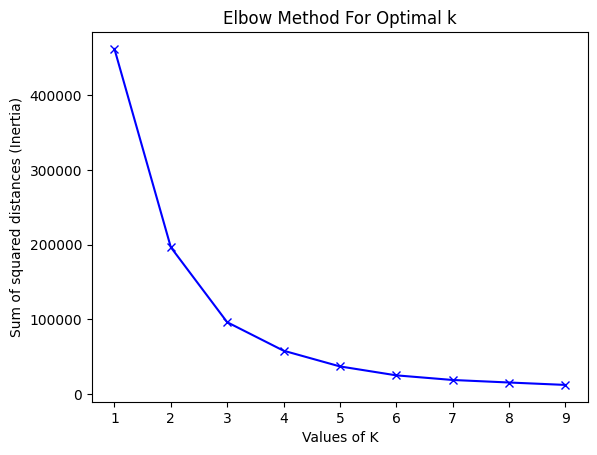

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_data_drop)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

The Silhouette Coefficient

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

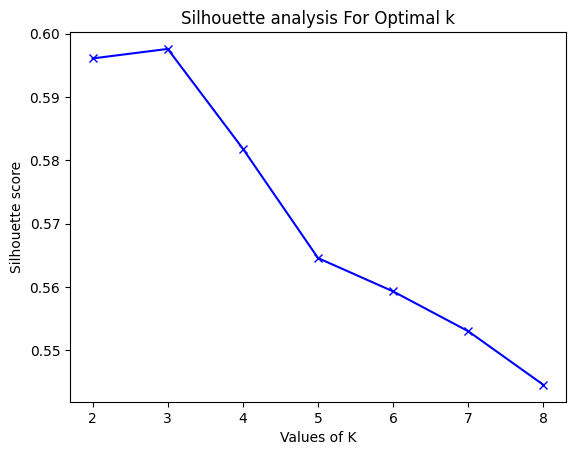

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_data_drop)
    cluster_labels = kmeans.labels_

 # silhouette score
    silhouette_avg.append(silhouette_score(df_data_drop, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
n=2
kmeans = KMeans(n_clusters=n, random_state=0).fit(df_data_drop)
hidden_states = kmeans.predict(df_data_drop)
states = pd.DataFrame(hidden_states,index=df_data_drop.index)
data_with_state = pd.concat([df_data_drop,states],axis=1,sort='False').dropna()
data_with_state.rename(columns={0:'state'}, inplace=True)
data_with_state

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-42-8bae5c5cf665>:5: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  data_with_state = pd.concat([df_data_drop,states],axis=1,sort='False').dropna()


,^VIX,return,SMA10,SMA50,state
Date,,,,,
1998-03-17,18.660000,0.001093,0.002707,0.002096,0
1998-03-18,18.290001,0.004693,0.003622,0.002149,0
1998-03-19,17.760000,0.003888,0.005183,0.002441,0
1998-03-20,18.690001,0.008644,0.004054,0.002667,0
1998-03-23,19.980000,-0.003284,0.004045,0.002767,0
...,...,...,...,...,...
2022-12-23,20.870001,0.005868,-0.002223,0.001048,0
2022-12-27,21.650000,-0.004050,-0.004056,0.001440,0
2022-12-28,22.139999,-0.012021,-0.005987,0.000670,0


In [ ]:
data_with_state['S&P 500 daily price'] = df_data['^SPX']
data_with_state.dropna(inplace=True)
data_with_state

,^VIX,return,SMA10,SMA50,state,S&P 500 daily price
Date,,,,,,
1998-03-17,18.660000,0.001093,0.002707,0.002096,0,1080.449951
1998-03-18,18.290001,0.004693,0.003622,0.002149,0,1085.520020
1998-03-19,17.760000,0.003888,0.005183,0.002441,0,1089.739990
1998-03-20,18.690001,0.008644,0.004054,0.002667,0,1099.160034
1998-03-23,19.980000,-0.003284,0.004045,0.002767,0,1095.550049
...,...,...,...,...,...,...
2022-12-23,20.870001,0.005868,-0.002223,0.001048,0,3844.820068
2022-12-27,21.650000,-0.004050,-0.004056,0.001440,0,3829.250000
2022-12-28,22.139999,-0.012021,-0.005987,0.000670,0,3783.219971


<Axes: xlabel='Date', ylabel='S&P 500 daily price'>

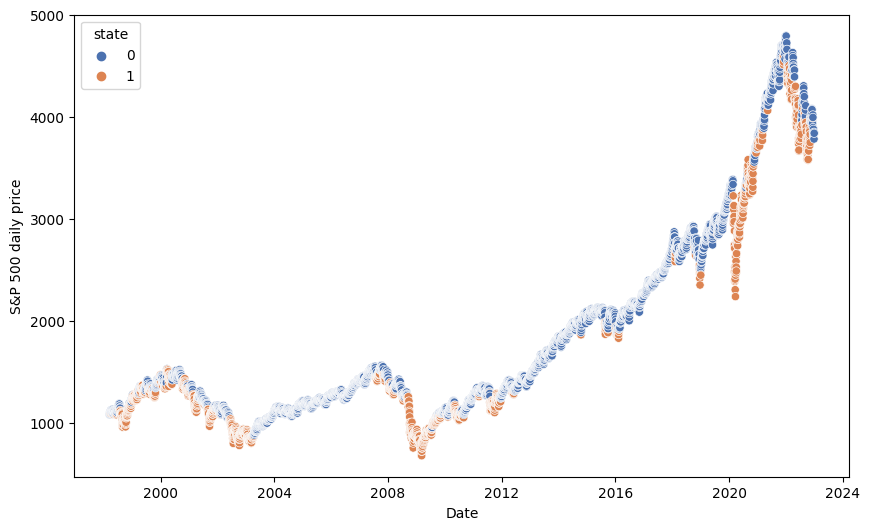

In [ ]:
import seaborn as sns

# Plotting the time series using a scatterplot
fig, ax = plt.subplots(1,1,figsize=(10, 6))
sns.scatterplot(x='Date', y='S&P 500 daily price', data=data_with_state, hue='state', palette="deep")

### Investment Strategies

In [ ]:
#Yahoo Finance only US indices
start_date = "2019-01-01"
end_date = "2022-12-31"
ticker_list = ['^SPX', 'GOVT', 'GLD', 'USO', 'LQD', 'DJCI']
ETF_data_4 = []
for ticker in ticker_list:
    ETF_data_4.append(yf.download(ticker, start=start_date, end=end_date)['Adj Close'])
df_data_4 = pd.DataFrame(ETF_data_4).T
df_data_4.columns = ticker_list
df_data_4.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,^SPX,GOVT,GLD,USO,LQD,DJCI
Date,,,,,,
2019-01-02,2510.030029,22.882256,121.330002,78.800003,98.493431,14.1385
2019-01-03,2447.889893,23.011175,122.430000,79.599998,98.536949,14.2451
2019-01-04,2531.939941,22.891462,121.440002,81.440002,98.476021,14.4050
2019-01-07,2549.689941,22.845423,121.860001,82.320000,98.484741,14.4591
2019-01-08,2574.409912,22.799383,121.529999,84.000000,98.702324,14.5406


In [ ]:
def get_return(df):
  return df.pct_change()

In [ ]:
df_return = get_return(df_data_4)
df_return

,^SPX,GOVT,GLD,USO,LQD,DJCI
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.024757,0.005634,0.009066,0.010152,0.000442,0.007540
2019-01-04,0.034336,-0.005202,-0.008086,0.023116,-0.000618,0.011225
2019-01-07,0.007010,-0.002011,0.003458,0.010805,0.000089,0.003756
2019-01-08,0.009695,-0.002015,-0.002708,0.020408,0.002209,0.005637
...,...,...,...,...,...,...
2022-12-23,0.005868,-0.004350,0.002998,0.023929,-0.003073,0.000000
2022-12-27,-0.004050,-0.005679,0.008430,0.003029,-0.012890,0.000000
2022-12-28,-0.012021,-0.001318,-0.004506,-0.013663,-0.003123,0.000000


In [ ]:
df_return.dropna(inplace=True)
df_return.head()

,^SPX,GOVT,GLD,USO,LQD,DJCI
Date,,,,,,
2019-01-03,-0.024757,0.005634,0.009066,0.010152,0.000442,0.007540
2019-01-04,0.034336,-0.005202,-0.008086,0.023116,-0.000618,0.011225
2019-01-07,0.007010,-0.002011,0.003458,0.010805,0.000089,0.003756
2019-01-08,0.009695,-0.002015,-0.002708,0.020408,0.002209,0.005637
2019-01-09,0.004098,0.000000,0.006418,0.052381,0.003792,0.013026


In [ ]:
merged_data = pd.merge(df_return, data_with_state, on='Date', how='inner')
merged_data

,^SPX,GOVT,GLD,USO,LQD,DJCI,^VIX,return,SMA10,SMA50,state,price
Date,,,,,,,,,,,,
2019-01-03,-0.024757,0.005634,0.009066,0.010152,0.000442,0.007540,25.450001,-0.024757,-0.003695,-0.002333,0,2447.889893
2019-01-04,0.034336,-0.005202,-0.008086,0.023116,-0.000618,0.011225,21.379999,0.034336,0.001278,-0.001561,0,2531.939941
2019-01-07,0.007010,-0.002011,0.003458,0.010805,0.000089,0.003756,21.400000,0.007010,0.003556,-0.001310,0,2549.689941
2019-01-08,0.009695,-0.002015,-0.002708,0.020408,0.002209,0.005637,20.469999,0.009695,0.006585,-0.000499,0,2574.409912
2019-01-09,0.004098,0.000000,0.006418,0.052381,0.003792,0.013026,19.980000,0.004098,0.009706,-0.000790,1,2584.959961
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.005868,-0.004350,0.002998,0.023929,-0.003073,0.000000,20.870001,0.005868,-0.002223,0.001048,0,3844.820068
2022-12-27,-0.004050,-0.005679,0.008430,0.003029,-0.012890,0.000000,21.650000,-0.004050,-0.004056,0.001440,0,3829.250000
2022-12-28,-0.012021,-0.001318,-0.004506,-0.013663,-0.003123,0.000000,22.139999,-0.012021,-0.005987,0.000670,0,3783.219971


In [ ]:
merged_data.isnull().any(axis=0)

^SPX      False
GOVT      False
GLD       False
USO       False
LQD       False
DJCI      False
^VIX      False
return    False
SMA10     False
SMA50     False
state     False
price     False
dtype: bool

In [ ]:
merged_data = merged_data.drop(columns=['^VIX', 'return', 'SMA10', 'SMA50', 'price'])
merged_data

,^SPX,GOVT,GLD,USO,LQD,DJCI,state
Date,,,,,,,
2019-01-03,-0.024757,0.005634,0.009066,0.010152,0.000442,0.007540,0
2019-01-04,0.034336,-0.005202,-0.008086,0.023116,-0.000618,0.011225,0
2019-01-07,0.007010,-0.002011,0.003458,0.010805,0.000089,0.003756,0
2019-01-08,0.009695,-0.002015,-0.002708,0.020408,0.002209,0.005637,0
2019-01-09,0.004098,0.000000,0.006418,0.052381,0.003792,0.013026,1
...,...,...,...,...,...,...,...
2022-12-23,0.005868,-0.004350,0.002998,0.023929,-0.003073,0.000000,0
2022-12-27,-0.004050,-0.005679,0.008430,0.003029,-0.012890,0.000000,0
2022-12-28,-0.012021,-0.001318,-0.004506,-0.013663,-0.003123,0.000000,0


In [ ]:
print(merged_data.columns)

Index(['^SPX', 'GOVT', 'GLD', 'USO', 'LQD', 'DJCI', 'state'], dtype='object')


In [ ]:
# Assuming 'merged_data' is the DataFrame obtained after merging
# and it contains a 'state' column with values 0 or 1

# Filter for states 0 and 1 (if necessary)
filtered_data = merged_data[merged_data['state'].isin([0, 1])]

# Group by 'state' and compute the mean for each group
expected_returns = filtered_data.groupby('state').mean()

# If you want to exclude some non-return columns (e.g., 'Date') from the mean calculation
# expected_returns = filtered_data.drop(columns=['Date']).groupby(filtered_data['state']).mean()

print(expected_returns)

           ^SPX      GOVT       GLD       USO       LQD      DJCI
state                                                            
0     -0.000069 -0.000232  0.000192  0.001411 -0.000257  0.000436
1      0.001853  0.000108  0.000489  0.002005  0.000489  0.000113


In [ ]:
expected_returns

,^SPX,GOVT,GLD,USO,LQD,DJCI
state,,,,,,
0,-0.000069,-0.000232,0.000192,0.001411,-0.000257,0.000436
1,0.001853,0.000108,0.000489,0.002005,0.000489,0.000113


In [ ]:
'''
expected_returns_demo = pd.DataFrame({
    '^SPX': expected_returns['^SPX'],
    'GOVT': expected_returns['GOVT'],
    'GLD': expected_returns['GLD'],
    'USO': expected_returns['USO'],
    'LQD': expected_returns['LQD'],
    'DJCI': expected_returns['DJCI'],
}, index=[0, 1])

# Plotting
expected_returns_demo.T.plot(kind='bar', figsize=(10, 6))
plt.title('Expected Returns by State for Different Assets')
plt.ylabel('Return')
plt.xlabel('Asset')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.tight_layout()
plt.show()
'''

"\nexpected_returns_demo = pd.DataFrame({\n    '^SPX': expected_returns['^SPX'],\n    'GOVT': expected_returns['GOVT'],\n    'GLD': expected_returns['GLD'],\n    'USO': expected_returns['USO'],\n    'LQD': expected_returns['LQD'],\n    'DJCI': expected_returns['DJCI'],\n}, index=[0, 1])\n\n# Plotting\nexpected_returns_demo.T.plot(kind='bar', figsize=(10, 6))\nplt.title('Expected Returns by State for Different Assets')\nplt.ylabel('Return')\nplt.xlabel('Asset')\nplt.xticks(rotation=45)\nplt.legend(title='State')\nplt.tight_layout()\nplt.show()\n"

In [ ]:
'''
import matplotlib.pyplot as plt

# Reconstructing the provided DataFrame
data_by_state = {
    'SPX': expected_returns['^SPX'],
    'GOVT': expected_returns['GOVT'],
    'GLD': expected_returns['GLD'],
    'USO': expected_returns['USO'],
    'LQD': expected_returns['LQD'],
    'DJCI': expected_returns['DJCI']
}
df_by_state = pd.DataFrame(data_by_state, index=[0, 1])

# Plotting with "State" as the x-axis label
df_by_state.plot(kind='bar', figsize=(12, 7))
plt.title('Returns by State for Different Assets')
plt.ylabel('Return')
plt.xlabel('State')  # Explicitly setting x-axis label to "State"
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Asset')
plt.show()
'''

'\nimport matplotlib.pyplot as plt\n\n# Reconstructing the provided DataFrame\ndata_by_state = {\n    \'SPX\': expected_returns[\'^SPX\'],\n    \'GOVT\': expected_returns[\'GOVT\'],\n    \'GLD\': expected_returns[\'GLD\'],\n    \'USO\': expected_returns[\'USO\'],\n    \'LQD\': expected_returns[\'LQD\'],\n    \'DJCI\': expected_returns[\'DJCI\']\n}\ndf_by_state = pd.DataFrame(data_by_state, index=[0, 1])\n\n# Plotting with "State" as the x-axis label\ndf_by_state.plot(kind=\'bar\', figsize=(12, 7))\nplt.title(\'Returns by State for Different Assets\')\nplt.ylabel(\'Return\')\nplt.xlabel(\'State\')  # Explicitly setting x-axis label to "State"\nplt.xticks(rotation=0)\nplt.tight_layout()\nplt.legend(title=\'Asset\')\nplt.show()\n'

In [ ]:
# Filter data for state 0 (bear market)
state_0_data = merged_data[merged_data['state'] == 0].drop(columns=['state'])

# Filter data for state 1 (bull market)
state_1_data = merged_data[merged_data['state'] == 1].drop(columns=['state'])

# Calculate covariance and correlation matrices for state 0
cov_matrix_state_0 = state_0_data.cov()
corr_matrix_state_0 = state_0_data.corr()

# Calculate covariance and correlation matrices for state 1
cov_matrix_state_1 = state_1_data.cov()
corr_matrix_state_1 = state_1_data.corr()

print("Covariance Matrix for State 0 (Bear Market):\n", cov_matrix_state_0)
print("\nCorrelation Matrix for State 0 (Bear Market):\n", corr_matrix_state_0)
print("\nCovariance Matrix for State 1 (Bull Market):\n", cov_matrix_state_1)
print("\nCorrelation Matrix for State 1 (Bull Market):\n", corr_matrix_state_1)

Covariance Matrix for State 0 (Bear Market):
           ^SPX      GOVT       GLD       USO       LQD      DJCI
^SPX  0.000196 -0.000001  0.000020  0.000098  0.000032  0.000021
GOVT -0.000001  0.000014  0.000014 -0.000013  0.000019 -0.000002
GLD   0.000020  0.000014  0.000100  0.000046  0.000021  0.000010
USO   0.000098 -0.000013  0.000046  0.000704  0.000004  0.000051
LQD   0.000032  0.000019  0.000021  0.000004  0.000038  0.000001
DJCI  0.000021 -0.000002  0.000010  0.000051  0.000001  0.000042

Correlation Matrix for State 0 (Bear Market):
           ^SPX      GOVT       GLD       USO       LQD      DJCI
^SPX  1.000000 -0.023693  0.143548  0.263660  0.372673  0.228525
GOVT -0.023693  1.000000  0.362969 -0.124499  0.807449 -0.090117
GLD   0.143548  0.362969  1.000000  0.172012  0.335844  0.156971
USO   0.263660 -0.124499  0.172012  1.000000  0.026449  0.297868
LQD   0.372673  0.807449  0.335844  0.026449  1.000000  0.029845
DJCI  0.228525 -0.090117  0.156971  0.297868  0.029845  1.000

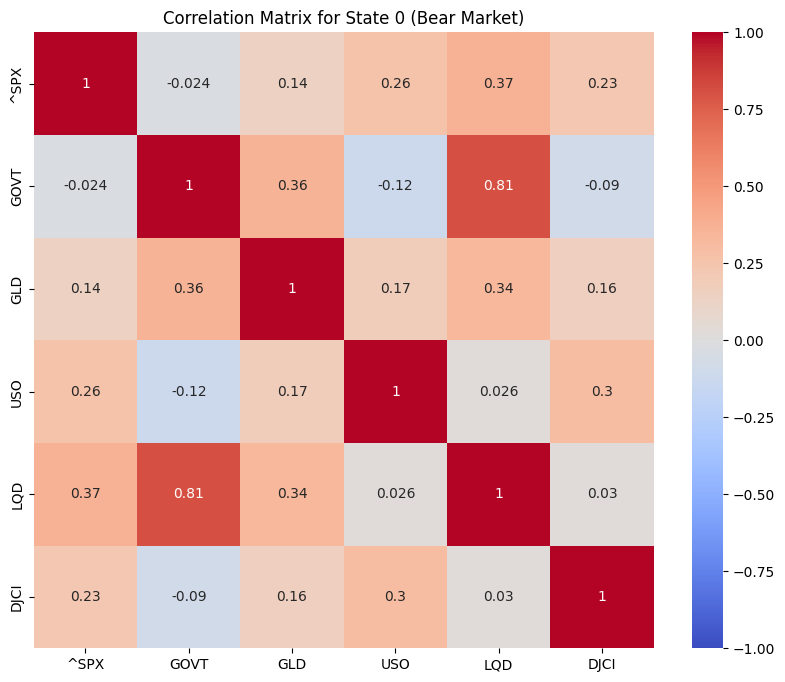

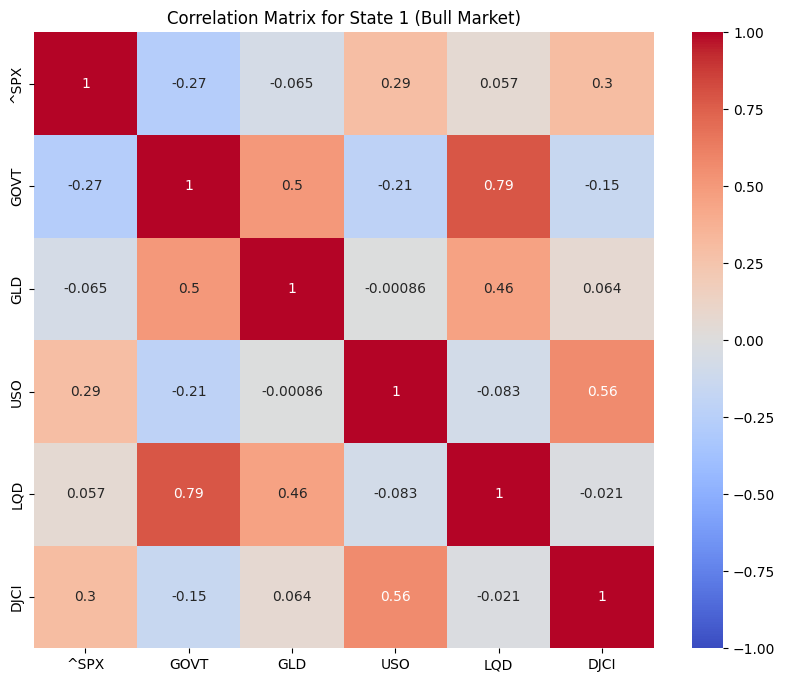

In [ ]:
import matplotlib.pyplot as plt

# Plotting heatmap for Correlation Matrix for State 0 (Bear Market)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_state_0, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for State 0 (Bear Market)')
plt.show()

# Plotting heatmap for Correlation Matrix for State 1 (Bull Market)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_state_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for State 1 (Bull Market)')
plt.show()

In [ ]:
# Dynamic Portfolio
import cvxpy as cp
import numpy as np

def optimize_portfolio(returns, risk_aversion, max_weight=0.8, min_weight=0.1):
    # Number of assets
    n = returns.shape[1]

    # Calculate expected returns and covariance matrix
    r = returns.mean().values
    Sigma = returns.cov().values

    # Portfolio weights
    w = cp.Variable(n)

    # Objective function
    objective = cp.Minimize(cp.quad_form(w, Sigma) - risk_aversion * r.T @ w)

    # Constraints
    constraints = [cp.sum(w) == 1, w >= min_weight, w <= max_weight]

    # Define and solve the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value

# Example usage:
state_0_returns = state_0_data  # Assuming 'state' column is already removed
state_1_returns = state_1_data  # Assuming 'state' column is already removed

risk_aversion = 1.0  # Change as needed
max_weight = 0.8  # Maximum weight for a single asset
min_weight = 0.05  # Minimum weight for a single asset
optimal_weights_state_0 = optimize_portfolio(state_0_returns, risk_aversion, max_weight, min_weight)
optimal_weights_state_1 = optimize_portfolio(state_1_returns, risk_aversion, max_weight, min_weight)

print("Optimal weights for State 0 (Bull Market):", optimal_weights_state_0)
print("Optimal weights for State 1 (Bear Market):", optimal_weights_state_1)

Optimal weights for State 0 (Bull Market): [0.05       0.05       0.05       0.73853175 0.05       0.06146825]
Optimal weights for State 1 (Bear Market): [0.55391306 0.05       0.05       0.24608694 0.05       0.05      ]


In [ ]:
'''
import cvxpy as cp

def optimize_portfolio(returns, risk_aversion):
    # Number of assets
    n = returns.shape[1]

    # Calculate expected returns and covariance matrix
    r = returns.mean().values
    Sigma = returns.cov().values

    # Portfolio weights
    w = cp.Variable(n)

    # Objective function
    # Note: We are maximizing returns, so we minimize the negative of returns.
    # We still want to penalize high variance, so we keep the variance term positive.
    objective = cp.Minimize(-r.T @ w + risk_aversion * cp.quad_form(w, Sigma))

    # Constraints
    constraints = [cp.sum(w) == 1, w >= 0]

    # Define and solve the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return w.value

state_0_returns = state_0_data
state_1_returns = state_1_data

risk_aversion = 1.0  # Change as needed

optimal_weights_state_0 = optimize_portfolio(state_0_returns, risk_aversion)
optimal_weights_state_1 = optimize_portfolio(state_1_returns, risk_aversion)

print("Optimal weights for State 0:", optimal_weights_state_0)
print("Optimal weights for State 1:", optimal_weights_state_1)
'''

'\nimport cvxpy as cp\n\ndef optimize_portfolio(returns, risk_aversion):\n    # Number of assets\n    n = returns.shape[1]\n\n    # Calculate expected returns and covariance matrix\n    r = returns.mean().values\n    Sigma = returns.cov().values\n\n    # Portfolio weights\n    w = cp.Variable(n)\n\n    # Objective function\n    # Note: We are maximizing returns, so we minimize the negative of returns.\n    # We still want to penalize high variance, so we keep the variance term positive.\n    objective = cp.Minimize(-r.T @ w + risk_aversion * cp.quad_form(w, Sigma))\n\n    # Constraints\n    constraints = [cp.sum(w) == 1, w >= 0]\n\n    # Define and solve the problem\n    prob = cp.Problem(objective, constraints)\n    prob.solve()\n\n    return w.value\n\nstate_0_returns = state_0_data\nstate_1_returns = state_1_data\n\nrisk_aversion = 1.0  # Change as needed\n\noptimal_weights_state_0 = optimize_portfolio(state_0_returns, risk_aversion)\noptimal_weights_state_1 = optimize_portfolio(sta

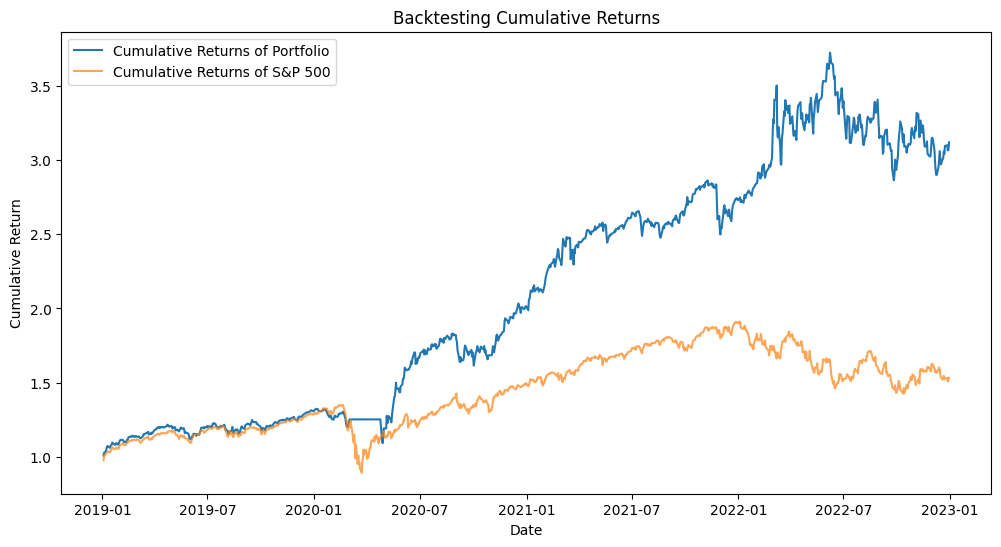

In [ ]:
import matplotlib.pyplot as plt

# Compute the portfolio's daily returns for each state
merged_data['portfolio_return'] = 0
merged_data.loc[merged_data['state'] == 0, 'portfolio_return'] = merged_data[merged_data['state'] == 0][ticker_list].multiply(optimal_weights_state_0, axis=1).sum(axis=1)
merged_data.loc[merged_data['state'] == 1, 'portfolio_return'] = merged_data[merged_data['state'] == 1][ticker_list].multiply(optimal_weights_state_1, axis=1).sum(axis=1)

# Compute the cumulative returns for the portfolio
merged_data['cumulative_return_portfolio'] = (1 + merged_data['portfolio_return']).cumprod()

# Compute the cumulative returns for the S&P 500 using its daily returns
merged_data['cumulative_return_sp500'] = (1 + merged_data['^SPX']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['cumulative_return_portfolio'], label='Cumulative Returns of Portfolio')
plt.plot(merged_data.index, merged_data['cumulative_return_sp500'], label='Cumulative Returns of S&P 500', alpha=0.7)
plt.legend()
plt.title('Backtesting Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()


In [ ]:
merged_data

,^SPX,GOVT,GLD,USO,LQD,DJCI,state,portfolio_return,cumulative_return_portfolio,cumulative_return_sp500
Date,,,,,,,,,,
2019-01-03,-0.024757,0.005634,0.009066,0.010152,0.000442,0.007540,0,0.007480,1.007480,0.975243
2019-01-04,0.034336,-0.005202,-0.008086,0.023116,-0.000618,0.011225,0,0.018783,1.026404,1.008729
2019-01-07,0.007010,-0.002011,0.003458,0.010805,0.000089,0.003756,0,0.008638,1.035270,1.015801
2019-01-08,0.009695,-0.002015,-0.002708,0.020408,0.002209,0.005637,0,0.015778,1.051605,1.025649
2019-01-09,0.004098,0.000000,0.006418,0.052381,0.003792,0.013026,1,0.016322,1.068769,1.029852
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.005868,-0.004350,0.002998,0.023929,-0.003073,0.000000,0,0.017745,3.095989,1.531782
2022-12-27,-0.004050,-0.005679,0.008430,0.003029,-0.012890,0.000000,0,0.001528,3.100719,1.525579
2022-12-28,-0.012021,-0.001318,-0.004506,-0.013663,-0.003123,0.000000,0,-0.011139,3.066180,1.507241


In [ ]:
'''
# Static Portfolio
import numpy as np
from scipy.optimize import minimize

# Assuming df_return already contains the returns of the four assets
mean_returns = df_return.mean()
cov_matrix = df_return.cov()

def objective(weights):
    portfolio_return = np.dot(mean_returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # Negate the Sharpe ratio because we want to maximize it, but the optimization function seeks to minimize the objective
    return -portfolio_return / portfolio_volatility

# The sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Asset bounds (0 <= weight <= 1 for each asset)
bounds = tuple((0, 1) for asset in range(len(mean_returns)))

# Initialize weights equally
initial_weights = [1./len(mean_returns) for asset in mean_returns]

# Optimization
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = solution.x

print("Optimal weights: ", optimal_weights)
'''

'\n# Static Portfolio\nimport numpy as np\nfrom scipy.optimize import minimize\n\n# Assuming df_return already contains the returns of the four assets\nmean_returns = df_return.mean()\ncov_matrix = df_return.cov()\n\ndef objective(weights):\n    portfolio_return = np.dot(mean_returns, weights)\n    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))\n    # Negate the Sharpe ratio because we want to maximize it, but the optimization function seeks to minimize the objective\n    return -portfolio_return / portfolio_volatility\n\n# The sum of weights is 1\nconstraints = ({\'type\': \'eq\', \'fun\': lambda weights: np.sum(weights) - 1})\n\n# Asset bounds (0 <= weight <= 1 for each asset)\nbounds = tuple((0, 1) for asset in range(len(mean_returns)))\n\n# Initialize weights equally\ninitial_weights = [1./len(mean_returns) for asset in mean_returns]\n\n# Optimization\nsolution = minimize(objective, initial_weights, method=\'SLSQP\', bounds=bounds, constraints=constr

In [ ]:
# Static Portfolio
import numpy as np
from scipy.optimize import minimize

# Assuming df_return already contains the returns of the four assets
mean_returns = df_return.mean()
cov_matrix = df_return.cov()

def objective(weights):
    portfolio_return = np.dot(mean_returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # Negate the Sharpe ratio because we want to maximize it, but the optimization function seeks to minimize the objective
    return -portfolio_return / portfolio_volatility

# The sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Asset bounds (0.1 <= weight <= 0.8 for each asset)
bounds = tuple((0.05, 0.8) for asset in range(len(mean_returns)))

# Initialize weights equally (but ensuring they fall within the new bounds)
initial_weights = [0.25 for asset in mean_returns]  # For four assets, this sums up to 1

# Optimization
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = solution.x

print("Optimal weights: ", optimal_weights)

Optimal weights:  [0.29214097 0.05       0.50785903 0.05       0.05       0.05      ]


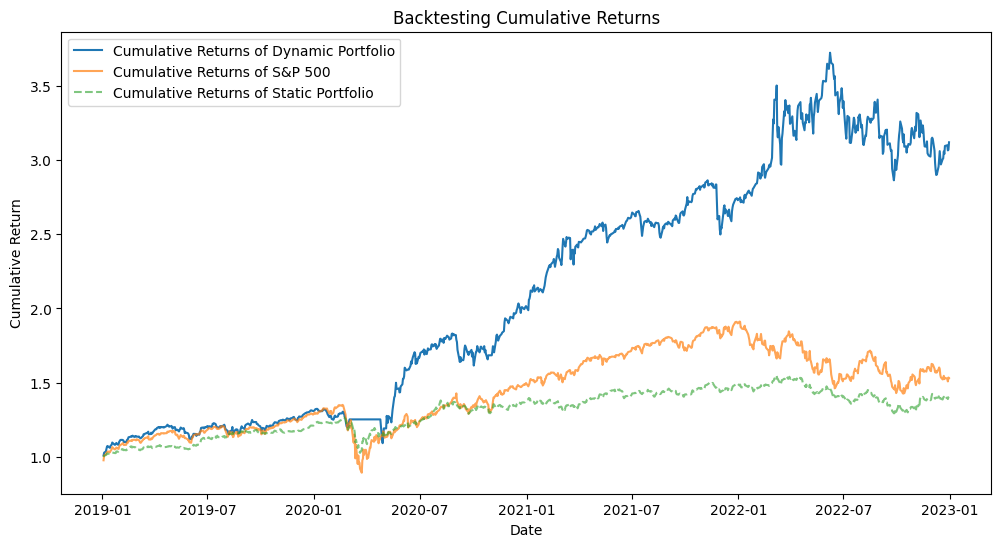

In [ ]:
# Given static weights
static_weights = optimal_weights

# Compute the daily returns for the static portfolio
merged_data['static_portfolio_return'] = merged_data[ticker_list].multiply(static_weights, axis=1).sum(axis=1)

# Compute the cumulative returns for the static portfolio
merged_data['cumulative_return_static'] = (1 + merged_data['static_portfolio_return']).cumprod()

# Your existing plotting code:
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['cumulative_return_portfolio'], label='Cumulative Returns of Dynamic Portfolio')
plt.plot(merged_data.index, merged_data['cumulative_return_sp500'], label='Cumulative Returns of S&P 500', alpha=0.7)

# Plotting the cumulative return of the static portfolio
plt.plot(merged_data.index, merged_data['cumulative_return_static'], label='Cumulative Returns of Static Portfolio', alpha=0.6, linestyle='--')

plt.legend()
plt.title('Backtesting Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

### Performance Measurements

In [ ]:
import numpy as np

# Annualized Return
merged_data['daily_return_portfolio'] = merged_data['cumulative_return_portfolio'].pct_change().fillna(0)
annualized_return_portfolio = np.mean(merged_data['daily_return_portfolio']) * 252

merged_data['daily_return_sp500'] = merged_data['cumulative_return_sp500'].pct_change().fillna(0)
annualized_return_sp500 = np.mean(merged_data['daily_return_sp500']) * 252

annualized_return_static = np.mean(merged_data['static_portfolio_return']) * 252

# Volatility (Annualized standard deviation)
volatility_portfolio = merged_data['daily_return_portfolio'].std() * np.sqrt(252)
volatility_sp500 = merged_data['daily_return_sp500'].std() * np.sqrt(252)
volatility_static = merged_data['static_portfolio_return'].std() * np.sqrt(252)

# Sharpe Ratio (assuming a risk-free rate of 0 for simplicity)
sharpe_ratio_portfolio = annualized_return_portfolio / volatility_portfolio
sharpe_ratio_sp500 = annualized_return_sp500 / volatility_sp500
sharpe_ratio_static = annualized_return_static / volatility_static

print("Performance Measurements:")
print("Dynamic Portfolio: Annualized Return =", annualized_return_portfolio,
      "Volatility =", volatility_portfolio,
      "Sharpe Ratio =", sharpe_ratio_portfolio)

print("S&P 500: Annualized Return =", annualized_return_sp500,
      "Volatility =", volatility_sp500,
      "Sharpe Ratio =", sharpe_ratio_sp500)

print("Static Portfolio: Annualized Return =", annualized_return_static,
      "Volatility =", volatility_static,
      "Sharpe Ratio =", sharpe_ratio_static)

Performance Measurements:
Dynamic Portfolio: Annualized Return = 0.31079724721884827 Volatility = 0.23470223615942098 Sharpe Ratio = 1.3242193696345523
S&P 500: Annualized Return = 0.1389748447362099 Volatility = 0.22881813267413484 Sharpe Ratio = 0.6073594042222483
Static Portfolio: Annualized Return = 0.09232547620286516 Volatility = 0.12256595092544621 Sharpe Ratio = 0.7532718141192771
